In [31]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [32]:
SAMPLE_RATE = 48000
SEGMENT_SIZE = 1
OVERLAP = 0.99

In [33]:
dir_xc = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\xeno-canto"
dir_k = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\noise-audio-data"

list_xc = [os.path.join(dir_xc, x) for x in os.listdir(dir_xc)]
list_k = [os.path.join(dir_k, x) for x in os.listdir(dir_k)]

dataset_xc = {os.path.basename(file): librosa.load(file, sr=SAMPLE_RATE)[0] for file in list_xc}
# dataset_k = {os.path.basename(file): librosa.load(file, sr=SAMPLE_RATE)[0] for file in list_k}

In [34]:
def segment_audio(audio, sr, seg_size, overlap):
    seg_samples = int(sr * seg_size)
    step = int(sr * (seg_size - overlap))
    if len(audio) < seg_samples:
        return np.empty((0, seg_samples))
    return np.vstack([audio[i:i + seg_samples] for i in range(0, len(audio) - seg_samples + 1, step)])

In [35]:
def feature_extractor(segments, sr):
    feature_names = [
        'Amplitude',
        'Zero Crossing Rate',
        'RMS Energy',
        'Spectral Centroid',
        'Spectral Bandwidth',
        'Spectral Rolloff',
        'Spectral Flatness',
        'RMS Energy'
    ]
    
    features_list = []
    for segment in segments:
        segment = segment.flatten()
        amp = np.mean(segment)
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=segment))
        rms = np.mean(librosa.feature.rms(y=segment))
        spec_cent = np.mean(librosa.feature.spectral_centroid(y=segment, sr=sr))
        spec_band = np.mean(librosa.feature.spectral_bandwidth(y=segment, sr=sr))
        spec_roll = np.mean(librosa.feature.spectral_rolloff(y=segment, sr=sr))
        spec_flat = np.mean(librosa.feature.spectral_flatness(y=segment))
        # pitch = 
        # centroid = 

        features_list.append([amp, zcr, rms, spec_cent, spec_band, spec_roll, spec_flat])
    
    return np.array(features_list), feature_names

In [36]:
file_name = "193835.mp3"
audio = dataset_xc[file_name]
segments = segment_audio(audio, SAMPLE_RATE, SEGMENT_SIZE, OVERLAP)
features, feature_names = feature_extractor(segments, SAMPLE_RATE)

In [37]:
time_axis = np.arange(features.shape[0]) * (SEGMENT_SIZE - OVERLAP)

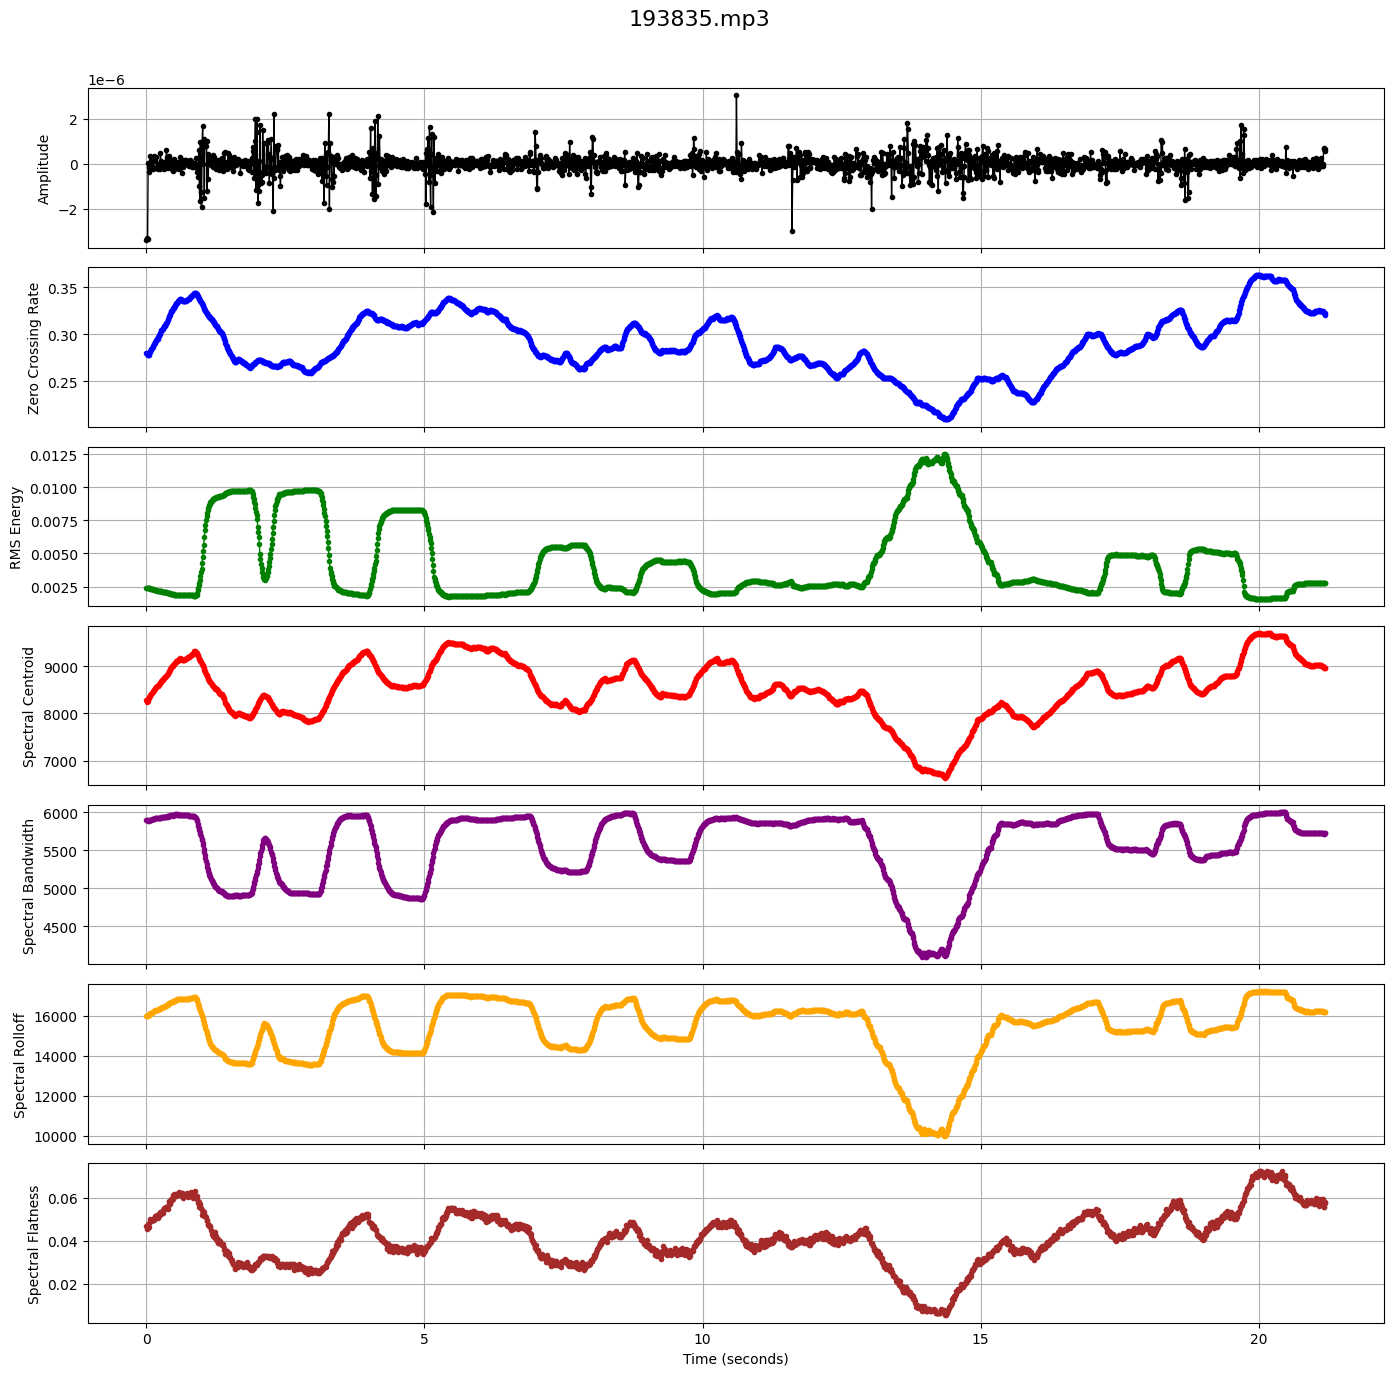

In [38]:
colors = ['black', 'blue', 'green', 'red', 'purple', 'orange', 'brown', 'gray']

plt.figure(figsize=(14, 2 * features.shape[1]))

for i in range(features.shape[1]):
    plt.subplot(features.shape[1], 1, i + 1)
    plt.plot(time_axis, features[:, i], label=feature_names[i],
             color=colors[i], marker='o', markersize=3, linewidth=1)
    plt.ylabel(feature_names[i])
    plt.grid(True)
    if i != features.shape[1] - 1:
        plt.tick_params(labelbottom=False)
    else:
        plt.xlabel('Time (seconds)')

plt.suptitle(f'{file_name}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()